# Intro to Probability & Statistics

#### TODO:
1. Descriptive Statistics:
    * Calculate statistics such as Mode, Mean, Median and Standard Deviation of weight and age. Do they respond to any known distribution?
    * Carry out an analysis of outliers and missing values.
    * Explain how the metrics vary when we breakdown the dataset by gender. Do they respond to any known distribution? Qualitatively and graphically compare both distributions.
2. Calculate the marginal and joint probability, and the correlation between two other variables, for example alcohol consumption and smoking.
    * Visually represent the joint probability between the possible values of the chosen variables.
3. Answer the following questions: What would happen to smoking levels if smoking is banned in bars? What would happen to the number of alcohol consumers if the number of smokers who drink alcohol decreases?

In [ ]:
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import plotly.graph_objs as go
sns.set_theme()

import warnings
warnings.filterwarnings("ignore")

In [ ]:
young = pd.read_csv('https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/people_responses.csv')

In [ ]:
pd.set_option('display.max_columns', None)
young.head(5)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0

In [ ]:
young.shape

(1010, 150)

Solved:

In [ ]:
age_stats = young.Age.dropna()
weight_stats = young.Weight.dropna()

pd.DataFrame(
    {
        'Age': [age_stats.mode()[0], age_stats.mean(), age_stats.median(), age_stats.std()],
     #'Weight': [age_stats.mode()[0], age_stats.mean(), age_stats.median(), age_stats.std()],
    },
    index=[
           'Mode', 'Mean', 'Median', 'Standard Deviation'
    ]
)

,Age
Mode,19.000000
Mean,20.433699
Median,20.000000
Standard Deviation,2.828840


In [ ]:
young[['Age','Weight','Gender','Smoking',	'Alcohol']].head(5)

,Age,Weight,Gender,Smoking,Alcohol
0,20.0,48.0,female,never smoked,drink a lot
1,19.0,58.0,female,never smoked,drink a lot
2,20.0,67.0,female,tried smoking,drink a lot
3,22.0,59.0,female,former smoker,drink a lot
4,20.0,59.0,female,tried smoking,social drinker


In [ ]:
young_02 = young[['Age','Weight','Gender','Smoking', 'Alcohol']]
young_02.head(5)

,Age,Weight,Gender,Smoking,Alcohol
0,20.0,48.0,female,never smoked,drink a lot
1,19.0,58.0,female,never smoked,drink a lot
2,20.0,67.0,female,tried smoking,drink a lot
3,22.0,59.0,female,former smoker,drink a lot
4,20.0,59.0,female,tried smoking,social drinker


### Missing values

In [ ]:
young_02.isna().sum() #isna == isnull; isnull() is just an alias of the isna() method

Age         7
Weight     20
Gender      6
Smoking     8
Alcohol     5
dtype: int64

In [ ]:
young_02[young_02.isna().any(axis=1)]

,Age,Weight,Gender,Smoking,Alcohol
130,19.0,66.0,female,NaN,NaN
137,NaN,NaN,NaN,never smoked,never
142,NaN,NaN,male,never smoked,social drinker
149,19.0,85.0,male,NaN,never
164,20.0,NaN,male,current smoker,social drinker
201,18.0,56.0,NaN,tried smoking,social drinker
209,21.0,NaN,male,never smoked,social drinker
226,25.0,54.0,NaN,tried smoking,social drinker
276,21.0,NaN,female,tried smoking,never
405,20.0,NaN,female,tried smoking,social drinker


In [ ]:
len(young_02[young_02.isna().any(axis=1)])

38

In [ ]:
young_02.shape

(1010, 5)

In [ ]:
young_03 = young_02.dropna()
young_03.shape

(972, 5)

In [ ]:
#count rows where a value is equal to zero
len(young_03[(young_03[['Age','Weight','Gender','Smoking', 'Alcohol']] == 0).any(axis=1)])

0

In [ ]:
young_03[['Age','Weight']] = young_03[['Age','Weight']].astype(int)
print(young_03.dtypes)

Age         int64
Weight      int64
Gender     object
Smoking    object
Alcohol    object
dtype: object


In [ ]:
young_03.head(5)

,Age,Weight,Gender,Smoking,Alcohol
0,20,48,female,never smoked,drink a lot
1,19,58,female,never smoked,drink a lot
2,20,67,female,tried smoking,drink a lot
3,22,59,female,former smoker,drink a lot
4,20,59,female,tried smoking,social drinker


*****
## 1. Descriptive statistics

In [ ]:
young_03.describe()

,Age,Weight
count,972.000000,972.000000
mean,20.431070,66.421811
std,2.826676,13.837480
min,15.000000,41.000000
25%,19.000000,55.000000
50%,20.000000,64.000000
75%,22.000000,75.000000
max,30.000000,165.000000


1.1 Age and Weight modes

In [ ]:
young_03[['Age','Weight']].mode()

,Age,Weight
0,19,60


1.2 Age and Weight means

In [ ]:
young_03[['Age','Weight']].agg(['mean'])

,Age,Weight
mean,20.43107,66.421811


In [ ]:
round(young_03[['Age','Weight']].agg(['mean']),2)

,Age,Weight
mean,20.43,66.42


In [ ]:
round(young_03[['Age','Weight']].agg(['mean']),0)

,Age,Weight
mean,20.0,66.0


1.3 Age and Weight standard deviations

In [ ]:
young_03[['Age','Weight']].agg(['std'])

,Age,Weight
std,2.826676,13.83748


In [ ]:
round(young_03[['Age','Weight']].agg(['std']),2)

,Age,Weight
std,2.83,13.84


In [ ]:
round(young_03[['Age','Weight']].agg(['std']),0)

,Age,Weight
std,3.0,14.0


1.4 Median

In [ ]:
young_03[['Age','Weight']].median()

Age       20.0
Weight    64.0
dtype: float64

In [ ]:
round(young_03[['Age','Weight']].median(),2)

Age       20.0
Weight    64.0
dtype: float64

### 2. Frequency Distribution by Age and Weight

2.1 Age

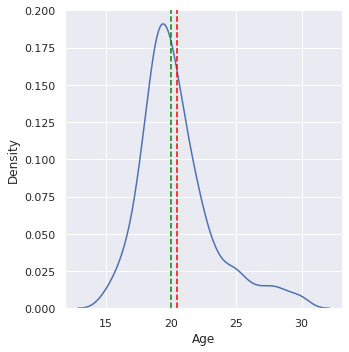

In [ ]:
sns.displot(x='Age', data=young_03, kind='kde')
plt.axvline(x=young_03.Age.mean(), color='red', ls='--')
plt.axvline(x=young_03.Age.median(), color='green', ls='--');

The graph is right skewed or positive skewed. The distribution is similar to a Poisson distribution.

2.2 Weight

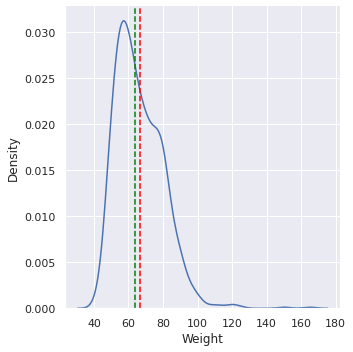

In [ ]:
sns.displot(x='Weight', data=young_03, kind='kde')
plt.axvline(x=young_03.Weight.mean(), color='red', ls='--')
plt.axvline(x=young_03.Weight.median(), color='green', ls='--');

The graph is right skewed or positive skewed too. The distribution is similar to a Poisson distribution.

### 3. Histogram

3.1 Age

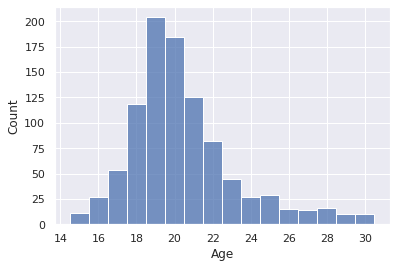

In [ ]:
sns.histplot(young_03['Age'], discrete=True);

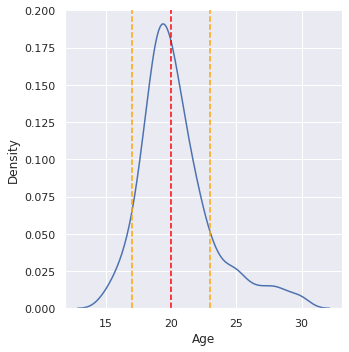

In [ ]:
sns.displot(x='Age', data=young_03, kind='kde')

m0 = round(young_03.Age.mean(),0)
sd0 = round(young_03.Age.std(),0)

plt.axvline(x=m0, color='red', ls='--')

plt.axvline(x=m0+sd0, color='orange', ls='--')
plt.axvline(x=m0-sd0, color='orange', ls='--');

3.2 Weight

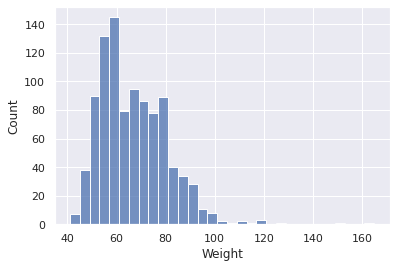

In [ ]:
sns.histplot(young_03['Weight']);

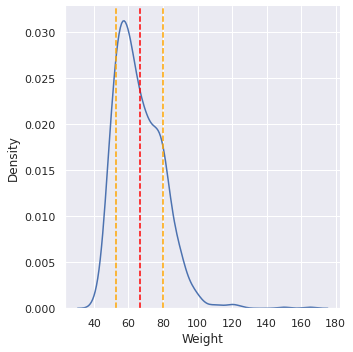

In [ ]:
sns.displot(x='Weight', data=young_03,  kind='kde')

m1 = young_03.Weight.mean()
sd1 = young_03.Weight.std()

plt.axvline(x=m1, color='red', ls='--')

plt.axvline(x=m1+sd1, color='orange', ls='--')
plt.axvline(x=m1-sd1, color='orange', ls='--');

3.3 Bivariate

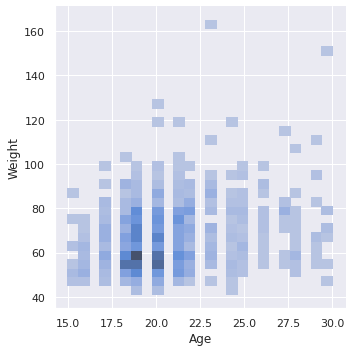

In [ ]:
sns.displot(x='Age', y='Weight', data=young_03);

### 4. Outliers

4.1 Traditional detection

4.1.1 Counting Age values

In [ ]:
young_03.Age.value_counts()

19    204
20    185
21    125
18    119
22     82
17     53
23     45
25     29
24     27
16     27
28     16
26     15
27     14
15     11
29     10
30     10
Name: Age, dtype: int64

4.1.2 Counting Weight values

In [ ]:
young_03.Weight.value_counts()

60     74
55     61
70     51
80     50
65     47
       ..
103     1
41      1
97      1
101     1
105     1
Name: Weight, Length: 69, dtype: int64

4.1.3 Age boxplot

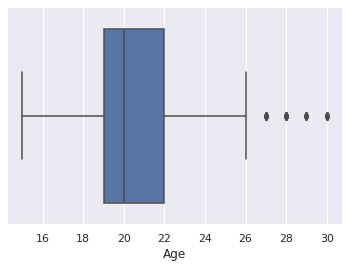

In [ ]:
sns.boxplot(young_03.Age);

4.1.4 Weight boxplot

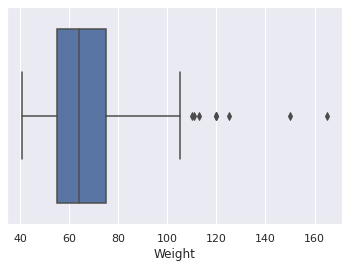

In [ ]:
sns.boxplot(young_03.Weight);

4.2 Outlier detection with Scipy

In [ ]:
#create a column with all the zscore values of the Age column
young_03['Zscore_Age'] = zscore(young_03.Age)

In [ ]:
#create a column with all the zscore values of the Weight column
young_03['Zscore_Weight'] = zscore(young_03.Weight)

In [ ]:
#two columns with the Zscores were created
young_03.head(5)

,Age,Weight,Gender,Smoking,Alcohol,Zscore_Age,Zscore_Weight
0,20,48,female,never smoked,drink a lot,-0.152579,-1.331983
1,19,58,female,never smoked,drink a lot,-0.506534,-0.608936
2,20,67,female,tried smoking,drink a lot,-0.152579,0.041806
3,22,59,female,former smoker,drink a lot,0.555330,-0.536632
4,20,59,female,tried smoking,social drinker,-0.152579,-0.536632


4.2.1 Outlier detection for Age

In [ ]:
# select outliers for 'Age'
display(young_03[~((young_03['Zscore_Age'] < 3) & (young_03['Zscore_Age'] > -3))])

,Age,Weight,Gender,Smoking,Alcohol,Zscore_Age,Zscore_Weight
186,29,65,female,tried smoking,social drinker,3.033012,-0.102804
191,29,67,female,former smoker,social drinker,3.033012,0.041806
221,30,71,male,current smoker,drink a lot,3.386967,0.331025
343,29,56,female,tried smoking,social drinker,3.033012,-0.753546
392,30,47,female,tried smoking,social drinker,3.386967,-1.404288
461,29,96,male,tried smoking,social drinker,3.033012,2.138642
473,29,64,male,current smoker,drink a lot,3.033012,-0.175108
478,30,80,male,former smoker,never,3.386967,0.981767
637,29,66,male,never smoked,social drinker,3.033012,-0.030499
683,30,80,female,never smoked,never,3.386967,0.981767


In [ ]:
young_03.shape

(972, 7)

In [ ]:
#removing outliers for 'Age'
young_04 = young_03[(young_03['Zscore_Age'] < 3) & (young_03['Zscore_Age'] > -3)]
young_04.shape

(952, 7)

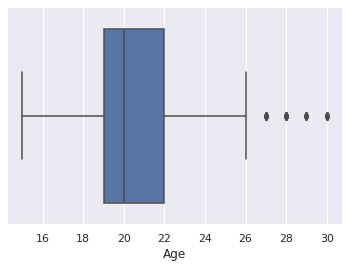

In [ ]:
#boxplotting age with outliers
sns.boxplot(young_03.Age);

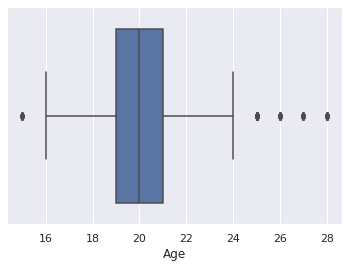

In [ ]:
#boxplotting age without outliers
sns.boxplot(young_04.Age);

4.2.2 Outlier detection for Weight

In [ ]:
# select outliers for 'Weight'
display(young_04[~((young_04['Zscore_Weight'] < 3) & (young_04['Zscore_Weight'] > -3))])

,Age,Weight,Gender,Smoking,Alcohol,Zscore_Age,Zscore_Weight
292,21,120,female,never smoked,social drinker,0.201375,3.873955
612,23,110,male,current smoker,social drinker,0.909285,3.150908
793,24,120,male,former smoker,never,1.263239,3.873955
796,27,113,male,tried smoking,social drinker,2.325103,3.367822
859,20,125,male,tried smoking,drink a lot,-0.152579,4.235478
885,23,165,female,current smoker,social drinker,0.909285,7.127666
973,20,120,female,current smoker,social drinker,-0.152579,3.873955


In [ ]:
young_04.shape

(952, 7)

In [ ]:
#removing outliers for 'Weight'
young_05 = young_04[(young_04['Zscore_Weight'] < 3) & (young_04['Zscore_Weight'] > -3)]
young_05.shape

(945, 7)

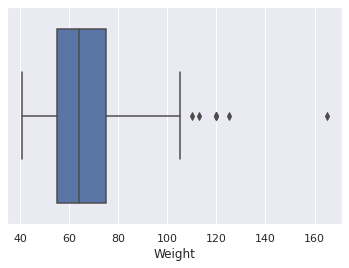

In [ ]:
#boxplotting Weight with outliers
sns.boxplot(young_04.Weight);

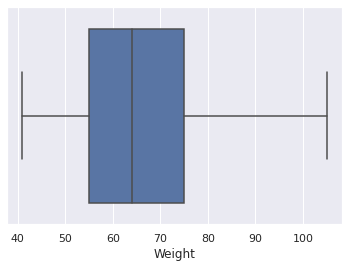

In [ ]:
#boxplotting Weight with outliers
sns.boxplot(young_05.Weight);

### 5. Gender breakdown

5.1 Age breakdown by gender

In [ ]:
# SQL: SELECT COUNT (Age) FROM young_05 WHERE Gender = "male" ORDER BY Age Desc;
age_male = pd.DataFrame(young_05['Age'][young_05['Gender'] == 'male'].value_counts().sort_index())
#rename "Age" column to 'Male' because the index is the Age
age_male.rename(columns={'Age': 'Male'}, inplace=True)
age_male

,Male
15,3
16,5
17,18
18,36
19,78
20,73
21,56
22,45
23,23
24,12


In [ ]:
# SQL: SELECT COUNT (Age) FROM young_05 WHERE Gender = "female" ORDER BY Age Desc;
age_female = pd.DataFrame(young_05['Age'][young_05['Gender'] == 'female'].value_counts().sort_index())
#rename "Age" column to 'Female' because the index is the Age
age_female.rename(columns={'Age': 'Female'}, inplace=True)
age_female

,Female
15,8
16,22
17,35
18,83
19,126
20,110
21,68
22,37
23,20
24,14


In [ ]:
#joins the two dataframes
age = pd.concat([age_male, age_female], axis=1)
age

,Male,Female
15,3,8
16,5,22
17,18,35
18,36,83
19,78,126
20,73,110
21,56,68
22,45,37
23,23,20
24,12,14


In [ ]:
# convert index of a pandas dataframe into a column: reset index
age = age.reset_index(level=0)
#rename "Age" column to 'Female' because the index is the Age
age.rename(columns={'index': 'Age'}, inplace=True)
age

,Age,Male,Female
0,15,3,8
1,16,5,22
2,17,18,35
3,18,36,83
4,19,78,126
5,20,73,110
6,21,56,68
7,22,45,37
8,23,23,20
9,24,12,14


In [ ]:
#Population Pyramid by gender-age
x1_age = age['Male']
x2_age = age['Female']*-1
y_age = age['Age']

#Create an instance of the figure
fig = go.Figure()

#Add trace to figure
fig.add_trace(go.Bar(
    x=x1_age,
    y=y_age,
    name='Male',
    orientation='h'
))

#Add trace to figure
fig.add_trace(go.Bar(
    x=x2_age,
    y=y_age,
    name='Female',
    orientation='h',
    hovertemplate='(%%{x},%%{y})<extra></extra>'% x2_age
))

# Update figure layout
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
    template = 'plotly_white',
    title = 'Age Pyramid',
    barmode='relative',
    bargap=0.0,
    bargroupgap=0,
    xaxis=dict(
        tickvals=[-100,-50,0,50,100],
        ticktext=['100','50','0','50','100'],
        title='Population',
        title_font_size=14
    ),
    yaxis=dict(
        title='Age',
        title_font_size=14
    )
)

# Plot figure
fig.show()

5.2 Weight breakdown by gender

In [ ]:
# SQL: SELECT COUNT (Weight) FROM young_05 WHERE Gender = "male" ORDER BY Age Desc;
weight_male = pd.DataFrame(young_05['Weight'][young_05['Gender'] == 'male'].value_counts().sort_index())
#rename "Weight" column to 'Male'
weight_male.rename(columns={'Weight': 'Male'}, inplace=True)
weight_male

,Male
53,1
55,3
56,4
57,1
59,1
60,14
62,7
63,5
64,6
65,21


### Correlation between variables

****
## 2. Joint probability

#### To do this we will define the concepts of marginal probability and joint probability

Marginal Probability: Probability of one variable without considering another, for example:

$$P_X=P[X=x]=\sum_{\forall y_i}p_{xy}(x,y_i)$$

#### Joint Probability: In a bivariate or multimavariate sample space, each possible outcome refers to two or more characteristics. Then the probability of a joint outcome is denoted $P(X \cap Y)$ and is defined as:

$$P_{XY}=P[(X=x)\cap(Y=y)]$$

__TODO:__
Do some research on [crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) pandas function.

****
## 3. Answers
### Smoking levels and smoking bans in bars

****
# Extras:

## Other data visualizations

#### We choose some characteristics (numerical) and analyze them breaking down by gender using a box plot